In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import datetime as dt

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")
conn=engine.connect()

In [3]:
Base = automap_base()
Base.prepare(engine, reflect=True)

In [4]:
Base.classes.keys()

['measurement', 'station']

In [5]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
session = Session(engine)

In [8]:
#Create DF for Measurments
measurement_df = pd.read_sql("SELECT * FROM Measurement",conn)
measurement_df = measurement.rename(columns={"id" : "ID", "station" : "Station", "date" : "Date", "prcp" : "Precipitation", "tobs" : "Time of Observation Bias"})
measurement_df.head()

,ID,Station,Date,Precipitation,Time of Observation Bias
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [18]:
#Create DF for Stations
station_df = pd.read_sql("SELECT * FROM Station", conn)
station_df = station.rename(columns={"id" : "ID", "station" : "Station", "name" : "Name", "latitude" : "Latitude", "longitude" : "Longitude", "elevation" : "Elevation"})
station_df.head()

,ID,Station,Name,Latitude,Longitude,Elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [21]:
#Merge both DF 
merge_df = pd.merge(station_df, measurement_df, on="Station", how="inner")
merge_df = measurement_station_df.drop(columns = ["ID_x", "ID_y"])
merge_df.head()

,Station,Name,Latitude,Longitude,Elevation,Date,Precipitation,Time of Observation Bias
0,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2010-01-01,0.08,65.0
1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2010-01-02,0.00,63.0
2,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2010-01-03,0.00,74.0
3,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2010-01-04,0.00,76.0
4,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2010-01-06,NaN,73.0


In [63]:
merge_df.sort_values(by="Date", ascending=False).head()

,Station,Name,Latitude,Longitude,Elevation,Date,Precipitation,Time of Observation Bias
19549,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,2017-08-23,0.45,76.0
12186,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,2017-08-23,0.08,82.0
2723,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,2017-08-23,0.00,81.0
7634,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,2017-08-23,0.00,82.0
12185,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,2017-08-22,0.00,82.0


In [27]:
last_year = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= '2016-05-16').\
filter(Measurement.date <= '2017-05-16').\
order_by(Measurement.date).all()
last_year_df = pd.DataFrame(last_year)
last_year_df

,date,prcp
0,2016-05-16,0.00
1,2016-05-16,0.00
2,2016-05-16,0.00
3,2016-05-16,NaN
4,2016-05-16,0.00
...,...,...
2288,2017-05-16,0.03
2289,2017-05-16,0.05
2290,2017-05-16,0.00
2291,2017-05-16,0.03


In [32]:
precipitation_data = last_year_df.rename(columns={"date" : "Date", "prcp" : "Precipitation"})
precipitation_data = precipitation_data.set_index("Date")
precipitation_data.head(20)

,Precipitation
Date,
2016-05-16,0.00
2016-05-16,0.00
2016-05-16,0.00
2016-05-16,NaN
2016-05-16,0.00
2016-05-16,0.00
2016-05-16,0.08
2016-05-17,0.00
2016-05-17,0.03


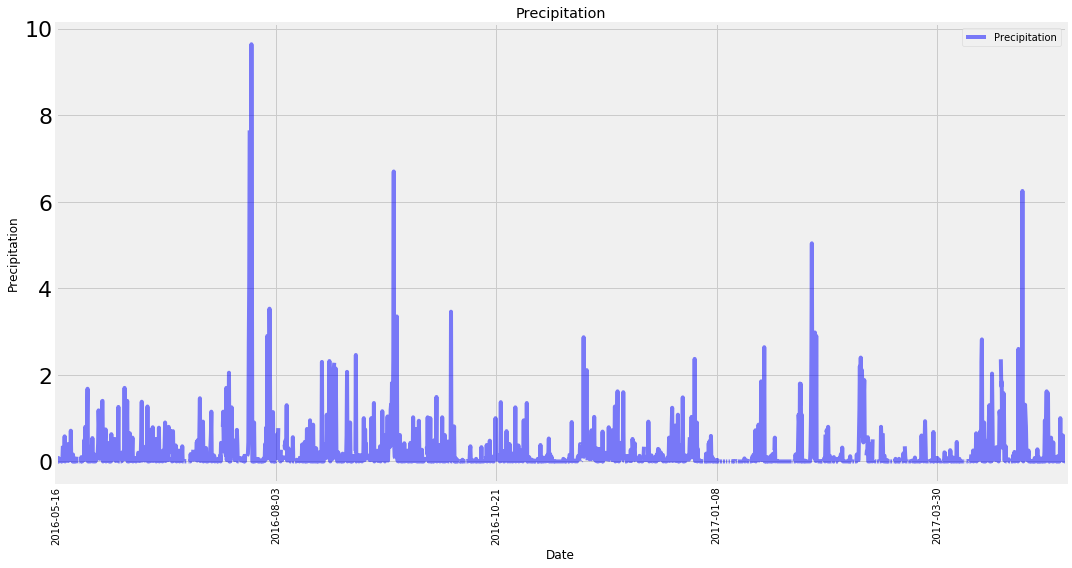

In [43]:
#Plot Data with Matplotlib
plot_precipitation = precipitation_data.plot(figsize = (15, 8), color = 'blue', alpha = 1.5);
plot_precipitation.set_xlabel("Date");
plot_precipitation.set_ylabel("Precipitation");
plot_precipitation.set_title("Precipitation");
plt.xticks(rotation=90)
plt.yticks(fontsize=22)
plt.legend(loc="best")

plt.tight_layout()

plt.savefig("Precipitation_lastyear.png")

In [44]:
precipitation_stats = precipitation_data.describe()
precipitation_stats

,Precipitation
count,2065.000000
mean,0.216470
std,0.571958
min,0.000000
25%,0.000000
50%,0.020000
75%,0.160000
max,9.640000


In [45]:
stations_number = session.query(Measurement.station, Station.name, func.count(Measurement.station)).\
filter(Measurement.station == Station.station).\
group_by(Measurement.station)

In [48]:
active_stations = pd.DataFrame(data= stations_number, columns =["Station ID", "Station Name/Location", "Count of Active Stations"])
active_stations_data = active_stations.sort_values(by= "Count of Active Stations", ascending=False)

active_stations_data

,Station ID,Station Name/Location,Count of Active Stations
6,USC00519281,"WAIHEE 837.5, HI US",2772
7,USC00519397,"WAIKIKI 717.2, HI US",2724
1,USC00513117,"KANEOHE 838.1, HI US",2709
8,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
3,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
0,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
4,USC00517948,"PEARL CITY, HI US",1372
5,USC00518838,"UPPER WAHIAWA 874.3, HI US",511


In [50]:
ltemp = session.query(Measurement.station, Station.name, func.min(Measurement.tobs)).\
filter(Measurement.station==Station.station)

htemp = session.query(Measurement.station, Station.name, func.max(Measurement.tobs)).\
filter(Measurement.station==Station.station)

ltemp
htemp

In [54]:
print(f"The lowest temperature fthe most active stations is: {ltemp[0][1]}")
print(f"Station ID: {ltemp[0][0]}")
print(f"The highest temperature from most active stations is- {htemp[0][1]}") 
print(f"Station ID: {htemp[0][0]}")

The lowest temperature fthe most active stations is: HONOLULU OBSERVATORY 702.2, HI US
Station ID: USC00511918
The highest temperature from most active stations is- WAIKIKI 717.2, HI US
Station ID: USC00519397


In [55]:
max_temperature = session.query(Measurement.station, Station.name, func.avg(Measurement.tobs)).\
filter(Measurement.station==Station.station).\
group_by(Measurement.station).\
filter(Measurement.station == 'USC00519397')
max_temperature

In [59]:
avg_temperature = round(max_temperature[0][2])
print(f"Average temperature from the most active station: {avg_temperature} degrees in Farenheit")
#avg_temperature

Average temperature from the most active station: 75 degrees in Farenheit


In [68]:
last_year2 = session.query(Measurement.station, Station.name, Measurement.date, Measurement.tobs).\
filter(Measurement.station == Station.station).\
filter(Measurement.station == "USC00519281").\
filter(Measurement.date >= "2016-05-16").\
filter(Measurement.date <= "2017-05-16").\
order_by(Measurement.date).all()
last_year2

[('USC00519281', 'WAIHEE 837.5, HI US', '2016-05-16', 75.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', '2016-05-17', 75.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', '2016-05-18', 72.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', '2016-05-19', 75.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', '2016-05-20', 72.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', '2016-05-21', 76.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', '2016-05-22', 76.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', '2016-05-23', 74.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', '2016-05-24', 69.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', '2016-05-25', 71.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', '2016-05-26', 74.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', '2016-05-27', 75.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', '2016-05-28', 72.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', '2016-05-29', 74.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', '2016-05-30', 70.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', '2016-05-31', 70.0),
 ('USC00519281', 'WAIHEE

In [70]:
hlast_year = pd.DataFrame(last_year2)
hlast_year_df = hlast_year.rename(columns={"station" : "Station", "name" : "Name", "date" : "Date", "tobs" : "Time of Observation Bias"})
hlast_year_df.head()

,Station,Name,Date,Time of Observation Bias
0,USC00519281,"WAIHEE 837.5, HI US",2016-05-16,75.0
1,USC00519281,"WAIHEE 837.5, HI US",2016-05-17,75.0
2,USC00519281,"WAIHEE 837.5, HI US",2016-05-18,72.0
3,USC00519281,"WAIHEE 837.5, HI US",2016-05-19,75.0
4,USC00519281,"WAIHEE 837.5, HI US",2016-05-20,72.0


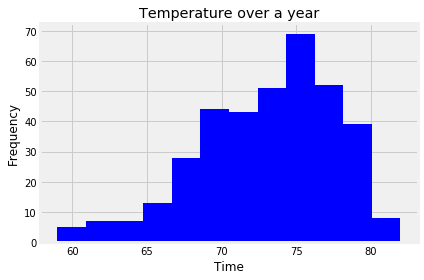

In [72]:
plt.hist(hlast_year_df["Time of Observation Bias"],bins=12, color="blue", alpha=1.0);
plt.title("Temperature over a year");
plt.xlabel("Time");
plt.ylabel("Frequency")

plt.tight_layout()

In [87]:
Temperature=[]
start_date='2016-05-16'
end_date='2017-05-16'
def calc_temps(start_date, end_date):
    results=session.query(func.max(Measurement.tobs).label("max_tobs"), \
                          func.min(Measurement.tobs).label("min_tobs"),\
                          func.avg(Measurement.tobs).label("avg_tobs")).\
                          filter(Measurement.date.between(start_date , end_date))  
    results = results.one()
    tmax = results.max_tobs
    tmin= results.min_tobs
    tavg= results.avg_tobs
    Temperature.append(tmax)
    Temperature.append(tmin)
    Temperature.append(tavg)
calc_temps(start_date, end_date)
Temperature

[84.0, 58.0, 74.39119058002616]

C:\Users\fedem\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


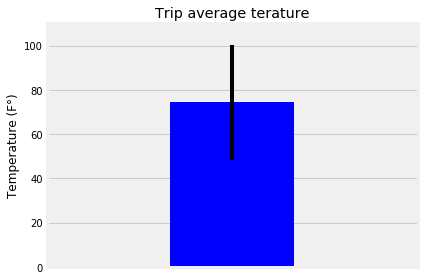

In [89]:
tavg=Temperature[2]
tmin=Temperature[1]
tmax=Temperature[0]
fig = plt.figure()
plt.bar( 1,tavg, color = 'blue', yerr = tmax-tmin, align='center')
plt.xlim(-0.2, 2.2)
plt.ylim([0, 110])
plt.axes().get_xaxis().set_visible(False)
plt.title('Trip average terature')
plt.ylabel("Temperature (F°)")
plt.tight_layout()
plt.show()

In [94]:
def calc_temps(start_date, end_date):
   return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-08-28', '2012-11-30'))

[(61.0, 73.6337817638266, 82.0)]


In [95]:
def daily_normals(date):
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [97]:
Rainfall = session.query(Measurement.station, func.count(Measurement.prcp)).\
                   group_by(Measurement.station).filter(Measurement.date.between('2016-05-16', '2017-05-16')).all()
Rainfall

[('USC00513117', 366),
 ('USC00514830', 265),
 ('USC00516128', 322),
 ('USC00517948', 61),
 ('USC00519281', 366),
 ('USC00519397', 363),
 ('USC00519523', 322)]

In [98]:
def daily_normals(date):
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [100]:
from sqlalchemy import extract  
trip_month=5
trip_days=range(5, 18)
for i in range(5, 18):
    range_trip=session.query(Measurement.date).filter(extract('month', Measurement.date)==trip_month).\
             filter(extract('day', Measurement.date)== i ).group_by(Measurement.date).order_by(Measurement.date).all()
range_trip

[('2010-05-17'),
 ('2011-05-17'),
 ('2012-05-17'),
 ('2013-05-17'),
 ('2014-05-17'),
 ('2015-05-17'),
 ('2016-05-17'),
 ('2017-05-17')]

In [107]:
dates=[]
daily_normals_tmax=[]
daily_normals_tmin=[]
daily_normals_tavg=[]

trip_month=5
trip_days=range(5, 18)

def daily_normals():
     for i in range(1,16):
        results=session.query(Measurement.date.label("dates"), func.max(Measurement.tobs).label("max_tobs"),\
                             func.min(Measurement.tobs).label("min_tobs"),func.avg(Measurement.tobs).label("avg_tobs")).\
                             filter(extract('month', Measurement.date)==trip_month).\
                             filter(extract('day', Measurement.date)== i ).group_by(Measurement.date).order_by(Measurement.date)
        results
        for results in results.all():
             print( results)
        results
        tmax = results.max_tobs
        tmin= results.min_tobs
        tavg= results.avg_tobs
        date= results.dates
        
        data = [tmax, tmin, tavg]

        dates.append(date)
        daily_normals_tmax.append(tmax)
        daily_normals_tmin.append(tmin)
        daily_normals_tavg.append(tavg)
        
daily_normals()

('2010-05-01', 77.0, 69.0, 73.375)
('2011-05-01', 77.0, 71.0, 74.16666666666667)
('2012-05-01', 75.0, 70.0, 71.5)
('2013-05-01', 78.0, 67.0, 73.5)
('2014-05-01', 74.0, 65.0, 69.14285714285714)
('2015-05-01', 75.0, 69.0, 72.71428571428571)
('2016-05-01', 79.0, 71.0, 75.83333333333333)
('2017-05-01', 78.0, 65.0, 72.0)
('2010-05-02', 74.0, 71.0, 71.75)
('2011-05-02', 79.0, 65.0, 73.11111111111111)
('2012-05-02', 75.0, 67.0, 70.875)
('2013-05-02', 77.0, 68.0, 73.75)
('2014-05-02', 78.0, 69.0, 71.875)
('2015-05-02', 76.0, 71.0, 73.6)
('2016-05-02', 77.0, 72.0, 74.14285714285714)
('2017-05-02', 79.0, 73.0, 76.5)
('2010-05-03', 75.0, 67.0, 71.77777777777777)
('2011-05-03', 73.0, 69.0, 70.55555555555556)
('2012-05-03', 75.0, 68.0, 71.33333333333333)
('2013-05-03', 84.0, 67.0, 75.25)
('2014-05-03', 78.0, 71.0, 74.42857142857143)
('2015-05-03', 78.0, 70.0, 74.8)
('2016-05-03', 78.0, 72.0, 75.28571428571429)
('2017-05-03', 78.0, 70.0, 75.6)
('2010-05-04', 77.0, 65.0, 73.22222222222223)
('2011-05-

In [111]:
Daily_normals_df= pd.DataFrame({'Date': dates, 'tmax': daily_normals_tmax, 'tmin': daily_normals_TMIN,'tavg': daily_normals_tavg,})
Daily_normals_df.set_index('Date', inplace=True, )
Daily_normals_df.head()

,tmax,tmin,tavg
Date,,,
2017-05-01,78.0,72.0,72.000000
2017-05-02,79.0,73.0,76.500000
2017-05-03,78.0,76.0,75.600000
2017-05-04,78.0,77.0,76.333333
2017-05-05,79.0,77.0,76.333333


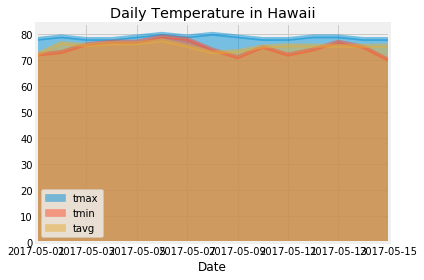

In [115]:
plot = Daily_normals_df.plot(kind='area', stacked=False, title='Daily Temperature in Hawaii')
plot.set_xlabel('Date')
plt.tight_layout()
plt.savefig('Daily Temperature in Hawaii.png', bbox_inches = 'tight')
plt.show()